#**BHARAT INTERN - DATA SCIENCE INTERNSHIP**

##***BY: M POOJA***


##**TASK 1: SMS CLASSIFIER**

Problem Statement: Develop a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python.

###***Importing the necessary libraries***

**Numpy** -- Perform array manipulation
and mathematical operations.

**Pandas** -- Data manipulation and analysis library.

**Sklearn.preprocessing** -- Preprocess data for machine learning models.

**Matplotlib** -- Plotting library for creating visualizations.

**NLTK** -- Toolkit for natural language processing tasks.

**Seaborn** -- Statistical data visualization library based on Matplotlib.

**WordCloud** -- Generate word clouds for text data visualization.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

###**Reading the dataset**

The **SMS Spam Collection** Dataset, taken from **Kaggle**, is a comprehensive collection of 5,572 SMS messages labeled as either spam or ham (non-spam). this dataset serves as a foundational resource for training and evaluating machine learning models for text classification tasks, particularly spam detection. Each message is represented as a single line of text, with one column indicating the message content and another indicating its classification. With its binary target variable and pre-processed nature, researchers and data scientists commonly utilize this dataset to experiment with various classification algorithms, feature engineering techniques, and text preprocessing methods aimed at developing accurate spam detection models.


In [ ]:
df = pd.read_csv('/content/SMS_spam.csv')
df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**head( )** -- To display the first few rows of a DataFrame in pandas

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**shape** -- Returns a tuple representing the dimensions of a DataFrame

In [ ]:
df.shape

(5572, 2)

**info( )** -- Provides a concise summary of a DataFrame's structure, including the data types, number of non-null values, and memory usage, offering insights into the dataset's composition and potential issues such as missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**rename( )** -- Used to rename one or more columns or index labels of a DataFrame, allowing for customization of column or index names to improve readability or consistency.

In [ ]:
#Renaming Columns
df = df.rename({'Category': 'target', 'Message': 'text'}, axis =1)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**LabelEncoder( )** -- A utility class from scikit-learn that is used to encode categorical labels as integers, transforming non-numerical labels into numerical representations suitable for machine learning algorithms.

In [ ]:
def le(col):
    labelencoder = LabelEncoder()
    col = labelencoder.fit_transform(col)
    return col
df['target'] = le(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**isna( ).sum( )** -- Calculates the sum of missing values for each column in the DataFrame

In [ ]:
df.isna().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()


0

**value_counts( )** --  A method in pandas that returns a Series containing counts of unique values in a DataFrame column, providing insights into the distribution of categorical or discrete values within the specified column.

In [ ]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

###**Pie Chart**

The pie chart visually displays the distribution of 'ham' and 'spam' classes in the 'target' column, with each slice representing the proportion of each class relative to the total. The percentage labels indicate the exact percentage of 'ham' and 'spam' instances in the dataset.

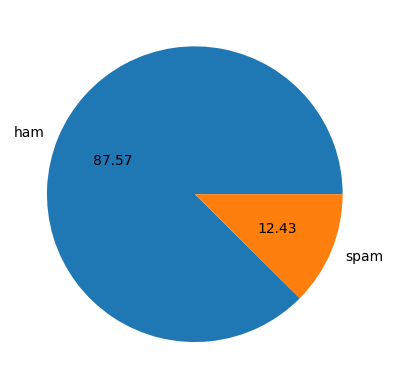

In [ ]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Adds a new column 'num_words' to the DataFrame 'df', which computes the **number of characters, number of words, number of sentences** in each text entry within the 'text' column using NLTK's word tokenization. This additional column provides information about the word count for each text entry, enabling analysis based on the length of the messages in terms of words.

In [ ]:
#get word count sentence count and character count
df['num_char'] =df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#num of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [ ]:
#num of sentences
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [ ]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


Generates a **histogram** comparing the distribution of the number of characters ('num_char') in 'ham' and 'spam' messages from the DataFrame 'df'. The ***blue histogram*** represents the distribution of character counts for ***'ham' messages***, while the ***red histogram*** represents the distribution for ***'spam' messages***.

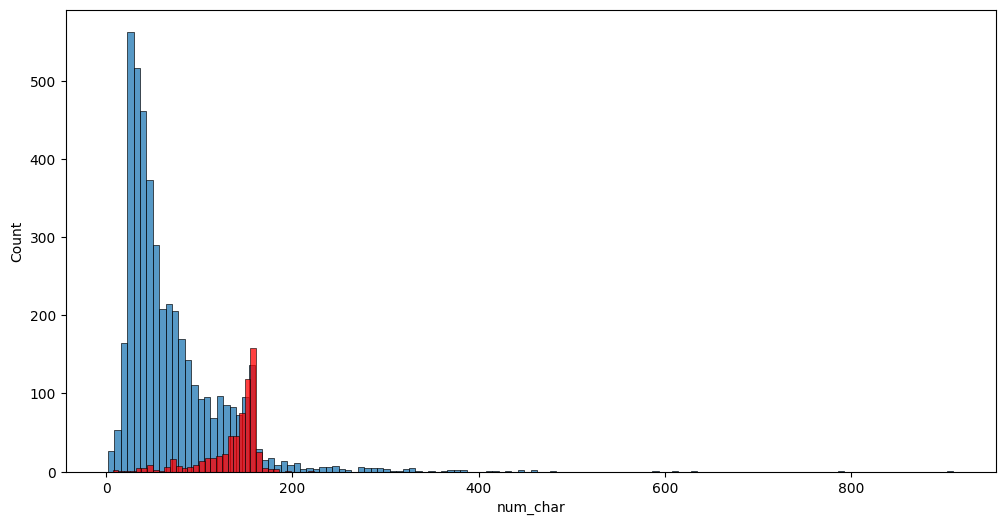

In [ ]:
#for ham messages the average number of characters are less compared to spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char']) #ham
sns.histplot(df[df['target'] == 1]['num_char'], color = 'red')#spam
plt.show()

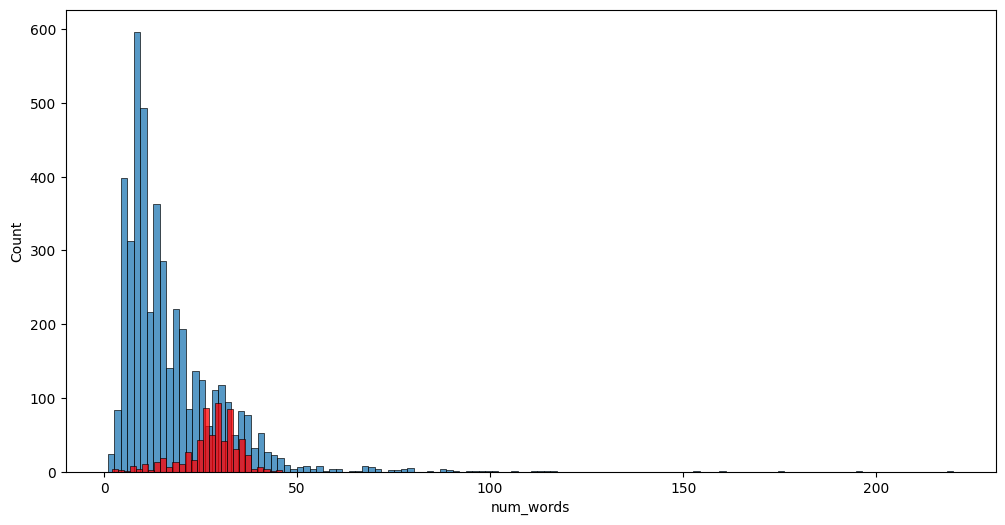

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) #ham
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')#spam
plt.show()

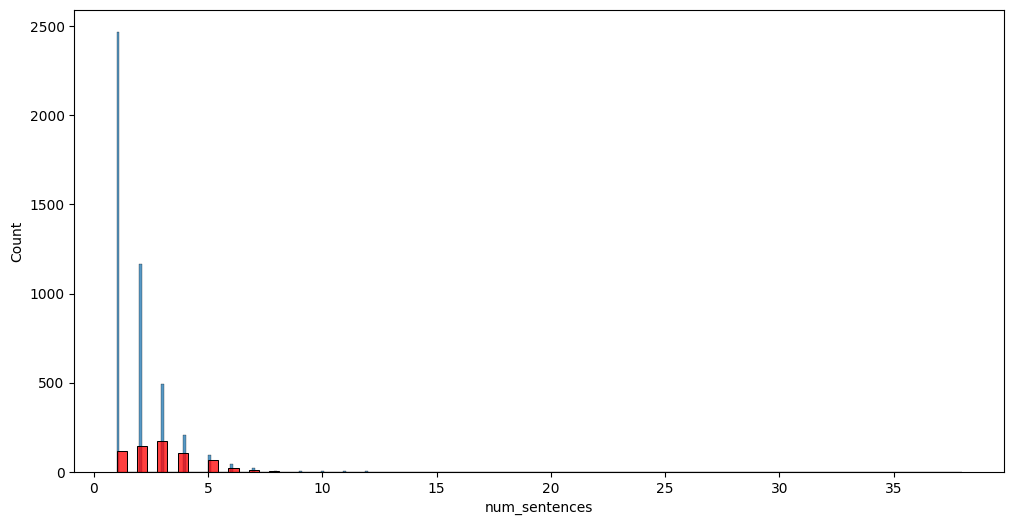

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']) #ham
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red')#spam
plt.show()

The code generates a **pairplot**, which visualizes pairwise relationships between different numerical features in the DataFrame 'df'. The 'hue' parameter is set to 'target', allowing for differentiation of 'ham' and 'spam' messages by color.

Each scatterplot represents the relationship between two numerical features, while the diagonal shows the distribution of each feature. This visualization helps identify patterns, correlations, and differences between 'ham' and 'spam' messages across multiple features simultaneously.

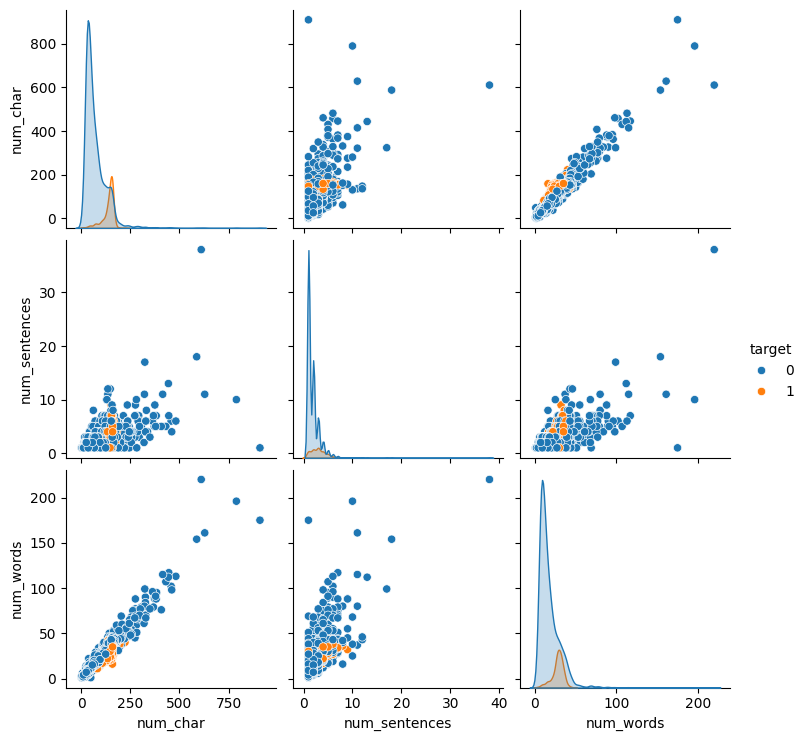

In [ ]:
sns.pairplot(df, hue = 'target')

**Heatmap**:

This visualization aids in understanding the **linear relationship** between different features and the target variable, providing insights into which features are more strongly correlated with the target ('ham' or 'spam') and potential multicollinearity among features.

<Axes: >

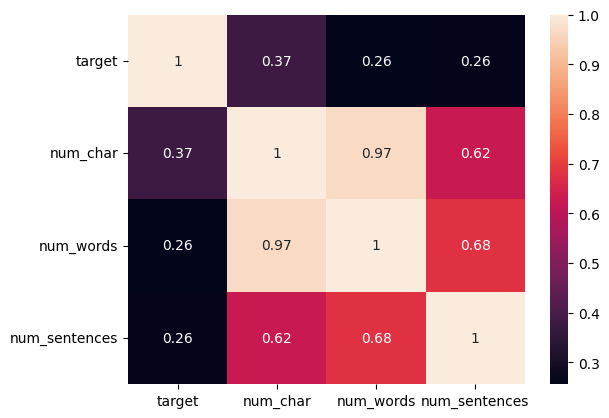

In [ ]:
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sentences']].corr(), annot = True)

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The **tranform_text()** function preprocesses text by converting it to lowercase, tokenizing it, removing special characters, stopwords, and punctuation, and finally stemming the words using NLTK's PorterStemmer. This function is designed to prepare text data for **natural language processing** tasks such as text classification or sentiment analysis.

In [ ]:
#Lets Create the Function
def tranform_text(text):
    text = text.lower()  #lower case
    text = nltk.word_tokenize(text)  # tokenization

    # removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    # remove stopwords and punctuation:
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    #Stemming
    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
tranform_text('HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%')

'hello priyanshu hope fine like machin learn'

In [ ]:
df['tranformed_text'] = df['text'].apply(tranform_text)
df.head()

,target,text,num_char,num_sentences,num_words,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


The code generates a **word cloud** visualization using the WordCloud library, where each word's size is proportional to its frequency in the 'tranformed_text' column of 'ham' messages from the DataFrame 'df'. This visualization provides a graphical representation of the **most common words** in 'ham' messages, aiding in understanding the prominent themes or topics within this category of messages.


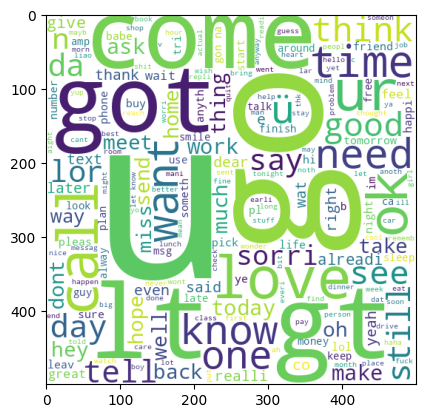

In [ ]:
# Word cloud of ham messages it shows the important words in text
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
ham_wordcloud = wc.generate(df[df['target'] ==0]['tranformed_text'].str.cat(sep=" "))
plt.imshow(ham_wordcloud)

In [ ]:
#lets get top 30 words in sapm messages
spam_corpus = []
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9781

In [ ]:
#this are top 30 words in spam
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(15), columns=['Word', 'Frequency'])
df_spam

,Word,Frequency
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


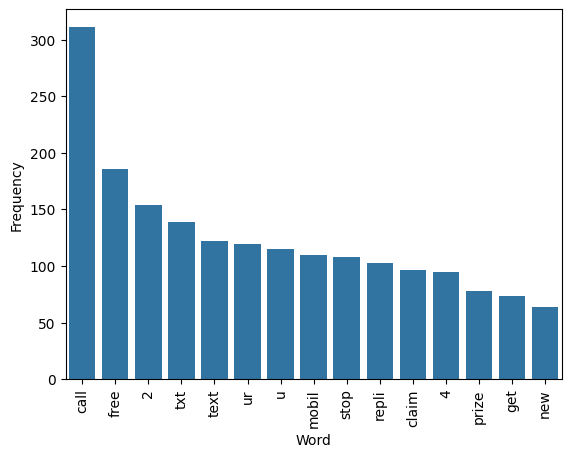

In [ ]:
sns.barplot(x='Word', y='Frequency', data=df_spam)
plt.xticks(rotation = 'vertical')
plt.show()

**CountVectorizer()**:

It is a feature extraction technique provided by scikit-learn, used for converting a collection of text documents into a matrix of token counts. It tokenizes the text and counts the occurrences of each token, creating a sparse matrix where rows represent documents and columns represent individual tokens, with each cell indicating the count of the token in the corresponding document.

This approach is commonly used as a preprocessing step for text data in natural language processing tasks such as document **classification or clustering**.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [ ]:
df.head()

,target,text,num_char,num_sentences,num_words,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [ ]:
X_cv = cv.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_cv.shape

(5157, 6781)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

Splits the feature matrix X_cv, likely representing token counts obtained through CountVectorizer, and the target variable y into **training and testing sets** (X_train, X_test, y_train, y_test). The training set (X_train and y_train) will be used to train machine learning models, while the testing set (X_test and y_test) will be used to evaluate the model's performance. The splitting ratio is set to 80% training and 20% testing (test_size=0.2), and the random_state parameter is set to 2 to ensure reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_cv, y, test_size =0.2, random_state = 2)

**GaussianNB( )** --  ideal for classification tasks with continuous features assumed to follow a Gaussian distribution.

**MultinomialNB( )** -- suitable for classification tasks with features representing counts or frequencies.

**BernoulliNB( )** -- Designed for classification tasks with binary/boolean features

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Precision score is particularly emphasized as it measures the ratio of correctly predicted positive observations to the total predicted positives, which is crucial in scenarios where correctly identifying positive cases (true positives) is of high importance, such as in spam detection where false positives should be minimized.

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))
#In this problem statement precision score is very importatant so it able to classify properly in this true positive

accuracy Score:  0.8691860465116279

confusion matrix: 
[[786 119]
 [ 16 111]]

precision score:  0.4826086956521739


The **accuracy score** is 0.869, suggesting that approximately ***86.9%*** of the predictions made by the model are correct.

The **precision score**, which measures the accuracy of positive predictions, is 0.483, indicating that around ***48.2%***of the messages classified as spam are truly spam.

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9796511627906976

confusion matrix: 
[[895  10]
 [ 11 116]]

precision score:  0.9206349206349206


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred3))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred3))
print()
print("precision score: ", precision_score(y_test, y_pred3))

accuracy Score:  0.9718992248062015

confusion matrix: 
[[902   3]
 [ 26 101]]

precision score:  0.9711538461538461


The **accuracy score** is 0.972, indicating that approximately ***97.2%*** of the predictions made by the model are correct.

The **precision score**, which measures the accuracy of positive predictions, is high at 0.971, indicating that around ***97.1%*** of the messages classified as spam are truly spam.



#**Inferences**:

**Data Preparation:** The project involved preprocessing the SMS dataset taken from Kaggle, including cleaning the text data, tokenization, removal of stopwords and punctuation, and stemming to transform the raw text into a format suitable for machine learning algorithms.

**Exploratory Data Analysis (EDA):** Various EDA techniques were employed to gain insights into the dataset, including visualizations such as histograms, word clouds, pairplots, and heatmaps, revealing patterns, distributions, and correlations among features.

**Model Selection and Training:** Three Naive Bayes classifiers - GaussianNB, MultinomialNB, and BernoulliNB - were trained on the preprocessed data. These classifiers were chosen due to their simplicity, efficiency, and effectiveness in text classification tasks.

**Model Evaluation:** The trained models were evaluated using performance metrics such as accuracy score, confusion matrix, and precision score. These metrics provided a comprehensive assessment of the models' predictive capabilities, highlighting their strengths and weaknesses in classifying spam and ham messages.

**Optimization and Conclusion:** The project achieved promising results, with the best-performing model (Gaussian Naive Bayes) achieving an accuracy score of 97.2% and a precision score of 97.1% for identifying spam messages. This indicates the effectiveness of the Naive Bayes approach for SMS spam detection. However, further optimization and fine-tuning of the models could potentially improve performance even further.

In **conclusion**, the project successfully demonstrated the application of machine learning techniques for SMS spam detection, showcasing the importance of preprocessing, model selection, and evaluation in building effective spam filtering systems.
